In [ ]:
# Import necessary libraries
import json
import pandas as pd

# For visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For Colab files
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
business_filepath = "/content/drive/My Drive/Colab Notebooks/yelp-dataset/yelp_academic_dataset_business.json"
review_filepath = "/content/drive/My Drive/Colab Notebooks/yelp-dataset/yelp_academic_dataset_review.json"
user_filepath = "/content/drive/My Drive/Colab Notebooks/yelp-dataset/yelp_academic_dataset_user.json"

### Prepare Restaurant Data

In [ ]:
# Generator function for businesses
def load_businesses(file_path):
    with open(file_path, 'r') as data_file:
        for line in data_file:
            business_info = json.loads(line)
            yield business_info

business_raw = pd.DataFrame(load_businesses(business_filepath))

In [ ]:
# Preview business data
business_raw.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
PA_mask = business_raw['state'] == 'PA'
restaurants_mask = business_raw['categories'].notna() & business_raw['categories'].str.contains('Restaurants')

In [ ]:
restaurants = business_raw[PA_mask & restaurants_mask]
restaurants.reset_index(drop=True, inplace=True)
restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [ ]:
restaurants.shape

(12641, 14)

In [ ]:
# Maintain set of restaurant business_ids to prune reviews
restaurant_ids = set(restaurants['business_id'])

### Prepare Restaurant Reviews

In [ ]:
# Generator function for filtered reviews
def load_filtered_reviews(file_path, restaurant_ids):
    with open(file_path, 'r') as data_file:
        for line in data_file:
            review_info = json.loads(line)
            if review_info['business_id'] in restaurant_ids:
                yield review_info

# Convert the filtered data into a DataFrame
review_raw = pd.DataFrame(load_filtered_reviews(review_filepath, restaurant_ids))

In [ ]:
# Preview review data
review_raw.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
3,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
4,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14


In [ ]:
review_raw.shape

(1100250, 9)

In [ ]:
  # Maintain set of user_ids to prune user data
user_ids = set(review_raw['user_id'])

In [ ]:
review_raw.describe()

,stars,useful,funny,cool
count,1.100250e+06,1.100250e+06,1.100250e+06,1.100250e+06
mean,3.745291e+00,1.081819e+00,3.468666e-01,4.873910e-01
std,1.367894e+00,2.472114e+00,1.376099e+00,1.777101e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,2.240000e+02,2.270000e+02,1.630000e+02


In [ ]:
review_raw.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [ ]:
review_raw['date'] = pd.to_datetime(review_raw['date']).dt.date

In [ ]:
review_raw.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23
3,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07
4,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14


### Prepare Users

In [ ]:
# Generator function for filtered users
def load_filtered_users(file_path, user_ids):
    with open(file_path, 'r') as data_file:
        for line in data_file:
            user_info = json.loads(line)
            if user_info['user_id'] in user_ids:
                yield user_info

# Convert the filtered data into a DataFrame
user_raw = pd.DataFrame(load_filtered_users(user_filepath, user_ids))

In [ ]:
user_raw.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323
3,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07 18:32:04,154,20,23,,"gy5fWeSv3Gamuq9Ox4MV4g, lMr3LWU6kPFLTmCpDkACxg...",4,...,0,0,0,0,1,6,3,3,0,0
4,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,2009-05-26 16:11:11,18,3,13,,"piejMEdRkGB7-1aL4lL5NQ, X0zFOU6iG95-feQKOXkgrA...",1,...,0,0,0,0,1,0,2,2,0,0


In [ ]:
user_raw.shape

(312426, 22)

In [ ]:
user_raw.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [ ]:
user_raw.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000,312426.000000
mean,35.640664,74.937905,31.636826,44.794771,2.623693,3.647673,3.284032,0.498460,0.339431,0.231799,0.126676,2.749682,5.517902,5.129791,5.129791,1.915471,2.248977
std,132.741373,1077.231636,724.201513,953.207991,33.756930,1.081002,114.556309,14.097274,20.181045,9.056863,7.820682,135.420895,222.732963,154.024955,154.024955,49.371450,136.733076
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,3.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.000000,1.000000,1.000000,0.000000,3.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,18.000000,4.000000,4.000000,1.000000,4.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17473.000000,206296.000000,185823.000000,199878.000000,12497.000000,5.000000,25784.000000,4347.000000,7039.000000,2974.000000,2607.000000,59031.000000,101097.000000,49967.000000,49967.000000,15934.000000,56104.000000


Cleaning up formatting error in `elite` column:

In [ ]:
user_raw[user_raw['elite'].str.contains("20,20")]['elite'].head(10)

,elite
1,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2..."
7,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2..."
20,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2..."
24,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2..."
25,"2016,2017,2018,2019,20,20,2021"
26,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2..."
33,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2..."
39,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,..."
43,"2017,2018,2019,20,20,2021"
47,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2..."


In [ ]:
user_raw['elite'] = user_raw['elite'].apply(lambda x: x.replace("20,20", "2020", 1))

In [ ]:
user_raw[user_raw['elite'].str.contains("2020")]['elite'].head(10)

,elite
1,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2..."
7,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2..."
20,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2..."
24,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2..."
25,"2016,2017,2018,2019,2020,2021"
26,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2..."
33,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2..."
39,"2012,2013,2014,2015,2016,2017,2018,2019,2020,2021"
43,"2017,2018,2019,2020,2021"
47,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2..."


In [ ]:
# Step 1: Preprocessing Users Dataset (Data cleaning)

# Convert 'yelping_since' to datetime
user_raw['yelping_since'] = pd.to_datetime(user_raw['yelping_since']).dt.date

# Convert elite to count of years in elite status
user_raw['elite_years'] = user_raw['elite'].apply(lambda x: len(x.split(',')) if x != '' else 0)

# Drop columns not useful initially
user_df_cleaned = user_raw.drop(columns=['friends', 'elite', 'compliment_hot', 'compliment_more',
                                        'compliment_profile', 'compliment_cute', 'compliment_note',
                                        'compliment_list', 'compliment_plain', 'compliment_cool',
                                        'compliment_funny', 'compliment_writer', 'compliment_photos'])

user_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312426 entries, 0 to 312425
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        312426 non-null  object 
 1   name           312426 non-null  object 
 2   review_count   312426 non-null  int64  
 3   yelping_since  312426 non-null  object 
 4   useful         312426 non-null  int64  
 5   funny          312426 non-null  int64  
 6   cool           312426 non-null  int64  
 7   fans           312426 non-null  int64  
 8   average_stars  312426 non-null  float64
 9   elite_years    312426 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 23.8+ MB


In [ ]:
#Check for duplicates
user_df_cleaned.duplicated().sum()

np.int64(0)

In [ ]:
#Check for missing data
user_df_cleaned.isnull().sum()

,0
user_id,0
name,0
review_count,0
yelping_since,0
useful,0
funny,0
cool,0
fans,0
average_stars,0
elite_years,0


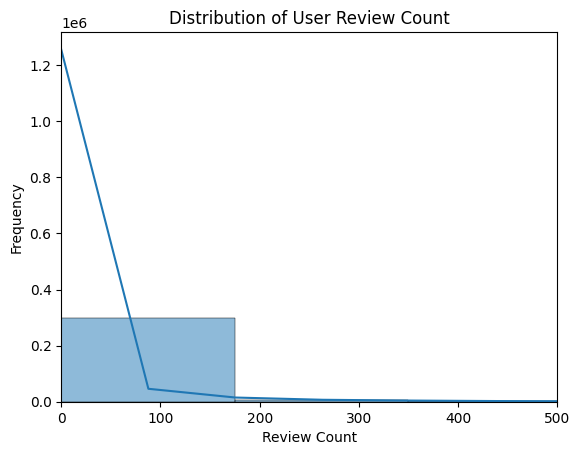

In [ ]:
#Step 2: Basic User EDA

#i. Distribution of review_count
sns.histplot(user_df_cleaned['review_count'], bins=100, kde=True)
plt.title('Distribution of User Review Count')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.show()

This plot shows the Distribution of User Review Count from the Yelp dataset.

Interpretation:
1. Highly Skewed Distribution (Right-skewed)

    Most users have very few reviews (close to 0).

    The frequency drops steeply as the review count increases.

    This is typical of user-generated content platforms—a small number of users are very active, while the majority contribute infrequently.

2. Long Tail

    A long tail stretches toward users with 100, 200, or even 400+ reviews.

    These are "power users" who write many reviews and are likely candidates for elite status.

3. Impact on Modeling

    When building recommendation systems:

        Cold-start users (few reviews) are hard to model accurately.

        Power users carry more weight in collaborative filtering but can dominate if not normalized.

4. Outlier Detection

    The small number of users with very high review counts may be outliers.

    These should be investigated (e.g., businesses posing as users, bots, or Yelp Elites).

Next Steps for EDA Based on This:

    Zoom in on users with <10 reviews (majority) vs those with >100 reviews.

    We will also consider log-transforming the review_count for modeling. This smooths the long tail and stabilizes variance — useful for visualization and algorithms sensitive to scale.

    Outlier Removal: Drop users with review_count > 99.5th percentile.

In [ ]:
#Summary of review count percentiles
review_summary_df = user_df_cleaned['review_count'] \
    .describe(percentiles=[.25, .5, .75, .9, .95, .995]) \
    .round(0) \
    .to_frame().T

review_summary_df

,count,mean,std,min,25%,50%,75%,90%,95%,99.5%,max
review_count,312426.0,36.0,133.0,0.0,3.0,7.0,22.0,72.0,152.0,741.0,17473.0


In [ ]:
#Outlier Removal: Drop users with review_count > 99.5th percentile.
# Compute the 99.5th percentile
percentile_995 = user_df_cleaned['review_count'].quantile(0.995)

# Filter users below or equal to the 99.5th percentile
user_df_outliercleaned = user_df_cleaned[user_df_cleaned['review_count'] <= percentile_995]

# Checking the new max
print("New max review_count:", user_df_outliercleaned['review_count'].max())

New max review_count: 741


In [ ]:
#View the cleaned data
user_df_outliercleaned.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,elite_years
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25,7217,1259,5994,267,3.91,1
3,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07,154,20,23,4,3.40,0
4,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,2009-05-26,18,3,13,1,4.29,0
5,wrNOKq0hOlz8q1N_YCNXCA,Peter,30,2008-09-30,30,10,12,5,4.33,0
6,65uUyG9yuF0rdMh0z7ajaA,Don,715,2005-11-30,808,258,712,37,3.79,10


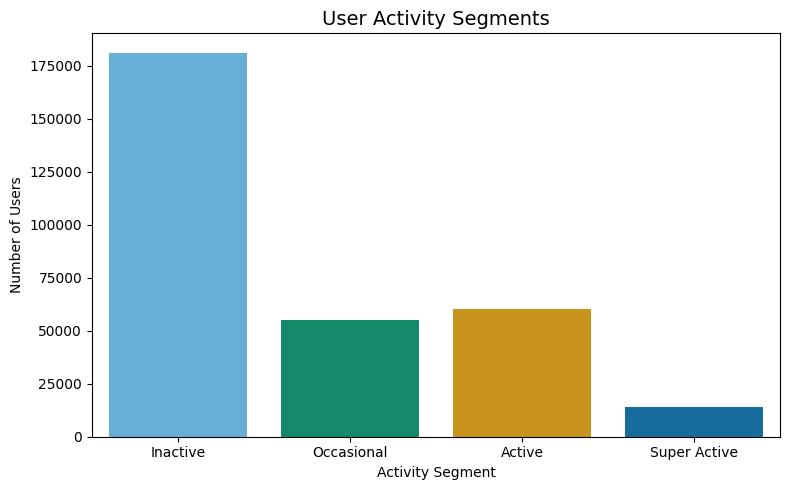

In [ ]:
#Plotting user activity segments
# Removing outliers beyond 99.5th percentile of review_count
threshold = user_df_cleaned['review_count'].quantile(0.995)
user_df_outliercleaned = user_df_cleaned[user_df_cleaned['review_count'] <= threshold].copy()

# Segment user activity
def segment_user_activity(count):
    if count <= 9:
        return 'Inactive'
    elif count <= 22:
        return 'Occasional'
    elif count <= 152:
        return 'Active'
    else:
        return 'Super Active'

user_df_outliercleaned['activity_segment'] = user_df_outliercleaned['review_count'].apply(segment_user_activity)

# Define color palette and segment order
colors = ['#0072B2', '#E69F00', '#56B4E9', '#009E73']
segment_order = ['Inactive', 'Occasional', 'Active', 'Super Active']

# Plot the user activity segments
plt.figure(figsize=(8, 5))
sns.countplot(
    data=user_df_outliercleaned,
    x='activity_segment',
    hue='activity_segment',
    order=segment_order,
    palette=colors,
    legend=False
)

plt.title('User Activity Segments', fontsize=14)
plt.xlabel('Activity Segment')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

Next Steps:
1. Check the distribution of average_stars by users
2. Analyse the correlation of review_count against average_stars

In [ ]:
#The distribution of average_stars by users
# Summary statistics for 'average_stars' as a DataFrame
average_stars_summary_df = user_df_outliercleaned['average_stars'] \
    .describe() \
    .round(0) \
    .to_frame().T

average_stars_summary_df

,count,mean,std,min,25%,50%,75%,max
average_stars,310867.0,4.0,1.0,1.0,3.0,4.0,4.0,5.0


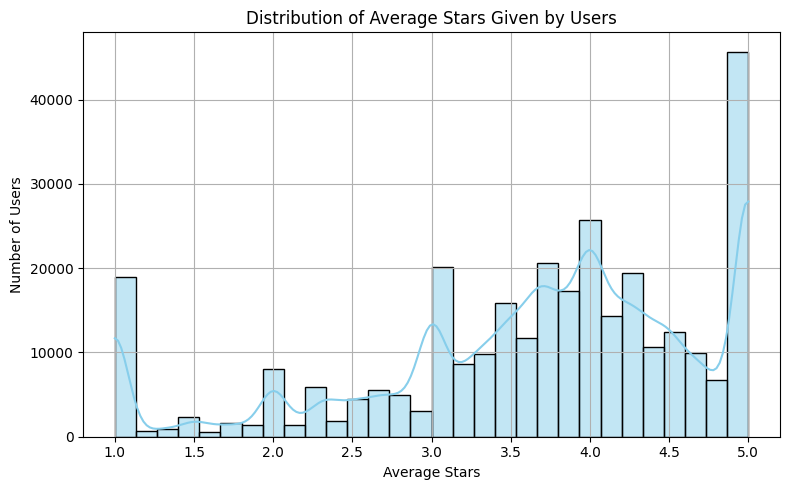

In [ ]:
# Plot the distribution of average stars per user
plt.figure(figsize=(8, 5))
sns.histplot(user_df_outliercleaned['average_stars'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Stars Given by Users')
plt.xlabel('Average Stars')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
user_df_outliercleaned.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,elite_years,activity_segment
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25,7217,1259,5994,267,3.91,1,Super Active
3,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07,154,20,23,4,3.40,0,Active
4,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,2009-05-26,18,3,13,1,4.29,0,Inactive
5,wrNOKq0hOlz8q1N_YCNXCA,Peter,30,2008-09-30,30,10,12,5,4.33,0,Active
6,65uUyG9yuF0rdMh0z7ajaA,Don,715,2005-11-30,808,258,712,37,3.79,10,Super Active


In [ ]:
import numpy as np
from datetime import datetime

In [ ]:
#Data Manipulation

# Ensuring that 'yelping_since' is datetime
if not pd.api.types.is_datetime64_any_dtype(user_df_outliercleaned['yelping_since']):
    user_df_outliercleaned['yelping_since'] = pd.to_datetime(user_df_outliercleaned['yelping_since'])

# Compute account age in years
current_year = datetime.now().year
user_df_outliercleaned['account_age'] = current_year - user_df_outliercleaned['yelping_since'].dt.year

# Compute reviews per year
user_df_outliercleaned['reviews_per_year'] = user_df_outliercleaned['review_count'] / user_df_outliercleaned['account_age']

#Statistical summary
user_df_outliercleaned[['review_count', 'account_age', 'elite_years', 'reviews_per_year']].describe()

,review_count,account_age,elite_years,reviews_per_year
count,310867.000000,310867.000000,310867.000000,310867.000000
mean,29.262389,11.215986,0.261311,2.355485
std,70.636564,3.071085,1.149409,5.348289
min,0.000000,3.000000,0.000000,0.000000
25%,3.000000,9.000000,0.000000,0.250000
50%,7.000000,11.000000,0.000000,0.636364
75%,21.000000,13.000000,0.000000,1.818182
max,741.000000,21.000000,16.000000,99.833333


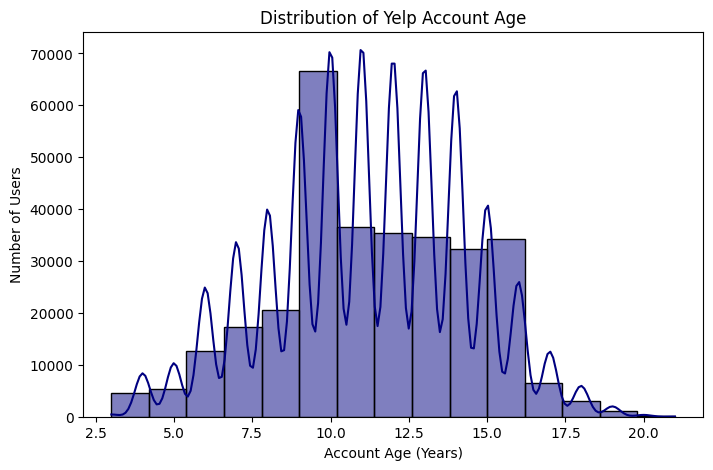

In [ ]:
#Distribution of Account Age
plt.figure(figsize=(8, 5))
sns.histplot(user_df_outliercleaned['account_age'], bins=15, kde=True, color='navy')
plt.title('Distribution of Yelp Account Age')
plt.xlabel('Account Age (Years)')
plt.ylabel('Number of Users')
plt.show()

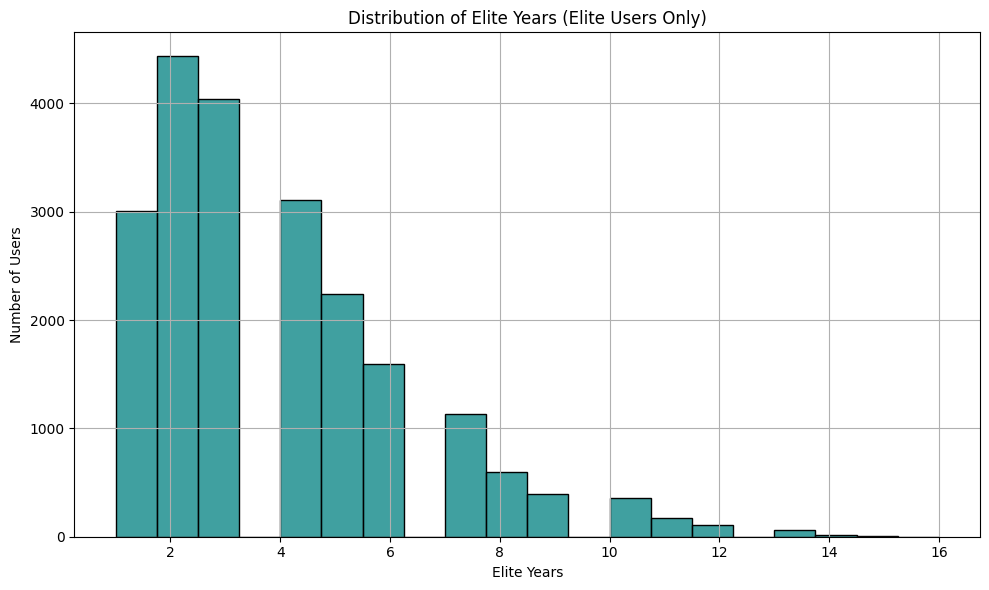

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to users with elite_years > 0
elite_users = user_df_outliercleaned[user_df_outliercleaned['elite_years'] > 0]

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(elite_users['elite_years'], bins=20, color='teal', edgecolor='black')

plt.title('Distribution of Elite Years (Elite Users Only)')
plt.xlabel('Elite Years')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()

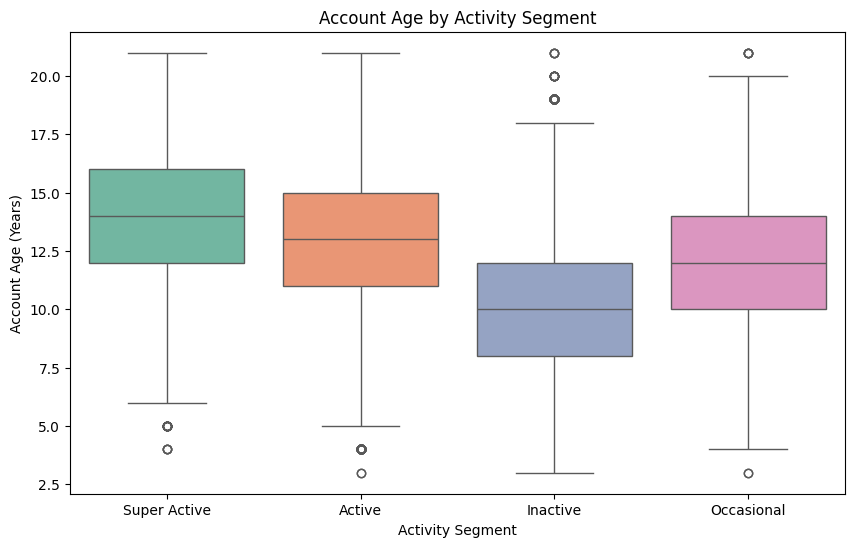

In [ ]:
#Long-Time Users vs Activity Segments
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_df_outliercleaned, x='activity_segment', y='account_age', palette='Set2', hue='activity_segment')
plt.title('Account Age by Activity Segment')
plt.xlabel('Activity Segment')
plt.ylabel('Account Age (Years)')
plt.show()

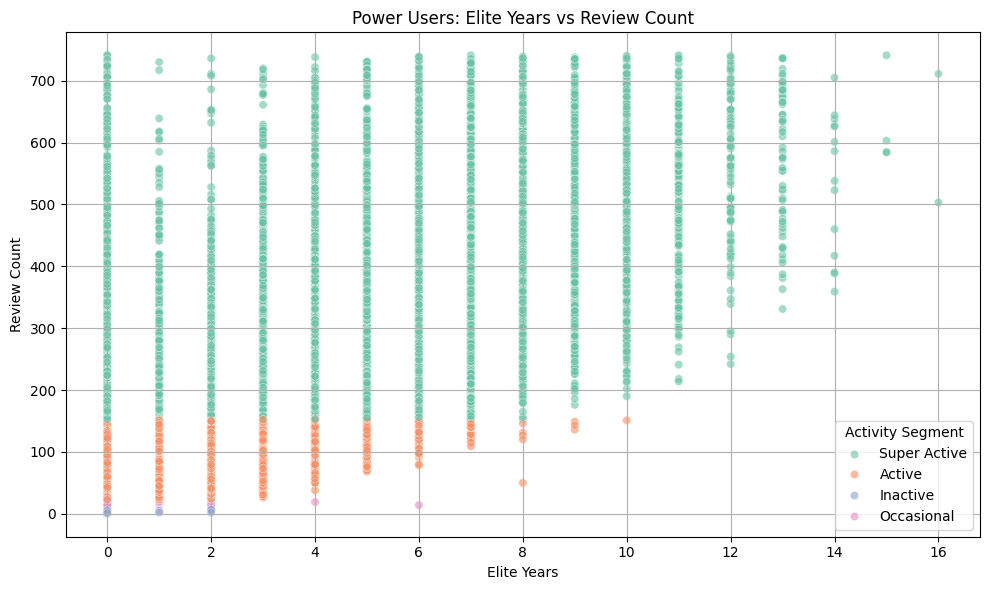

In [ ]:
#Power Users (Elite Years vs Review Activity)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=user_df_outliercleaned,
    x='elite_years',
    y='review_count',
    hue='activity_segment',
    palette='Set2',
    alpha=0.6
)

plt.title('Power Users: Elite Years vs Review Count')
plt.xlabel('Elite Years')
plt.ylabel('Review Count')
plt.legend(title='Activity Segment')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Create Flag Columns for Analysis
# Flag for long-time users (account older than 10 years)
user_df_outliercleaned['long_time_user'] = user_df_outliercleaned['account_age'] > 10

# Flag for power users (elite status ≥ 5 years)
user_df_outliercleaned['power_user'] = user_df_outliercleaned['elite_years'] >= 5

user_df_outliercleaned.head(10)

,user_id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,elite_years,activity_segment,account_age,reviews_per_year,long_time_user,power_user
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25,7217,1259,5994,267,3.91,1,Super Active,18,32.500000,True,False
3,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07,154,20,23,4,3.40,0,Active,15,7.266667,True,False
4,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,2009-05-26,18,3,13,1,4.29,0,Inactive,16,0.437500,True,False
5,wrNOKq0hOlz8q1N_YCNXCA,Peter,30,2008-09-30,30,10,12,5,4.33,0,Active,17,1.764706,True,False
6,65uUyG9yuF0rdMh0z7ajaA,Don,715,2005-11-30,808,258,712,37,3.79,10,Super Active,20,35.750000,True,True
8,aF3mEXDJuILmeF-9PcxAsQ,C.J.,250,2007-06-26,507,155,150,15,3.53,1,Super Active,18,13.888889,True,False
9,XLs_PhrJ7Qwn_RfgMM7Djw,Weili,90,2009-07-12,71,21,19,1,3.62,0,Active,16,5.625000,True,False
12,sgCZmOkdHBiaKaE6ZKVBaA,Chris,100,2005-12-12,100,19,25,2,3.19,0,Active,20,5.000000,True,False
13,bNJmIcxc_FRWxftI_vhpbg,Peyman,58,2009-04-04,28,8,5,0,3.06,0,Active,16,3.625000,True,False
14,2Yw9-N2VYZFqg2ylhpb8NA,Kathryn,11,2011-01-12,34,3,3,1,4.00,0,Occasional,14,0.785714,True,False


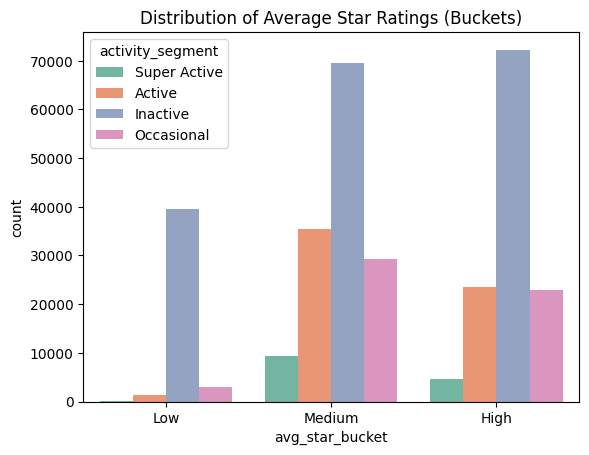

In [ ]:
# Average stars visualisation

# Bucket average_stars into categories: Low (<2.5), Medium (2.5–4), High (>4)
def bucket_avg_stars(stars):
    if stars < 2.5:
        return 'Low'
    elif stars <= 4:
        return 'Medium'
    else:
        return 'High'

user_df_outliercleaned['avg_star_bucket'] = user_df_outliercleaned['average_stars'].apply(bucket_avg_stars)

# Visualize distribution of average star buckets
sns.countplot(data=user_df_outliercleaned, x='avg_star_bucket', order=['Low', 'Medium', 'High'], hue='activity_segment', palette='Set2')
plt.title("Distribution of Average Star Ratings (Buckets)")
plt.show()

In [ ]:
user_df_outliercleaned.shape

(310867, 16)

Across all activity categories — from *Inactive* to *Super Active* — most users tend to give ratings in the **Medium** range, that is average stars between 2.5 and 4. This suggests that overall, user sentiment on Yelp is generally moderate rather than extreme, regardless of how active they are. Highly active users do not appear significantly more positive or negative in their ratings compared to less active users, indicating a consistent reviewing style across activity levels.

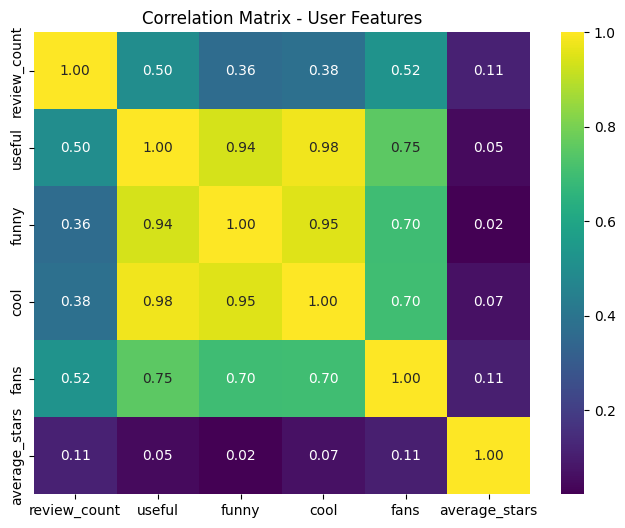

In [ ]:
#Statistical Analysis
# =============================

# Correlation matrix
corr_matrix = user_df_outliercleaned[['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars']].corr()

# Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix - User Features")
plt.show()

###Observations from the **correlation matrix** for user features:

---

### **1. Strong correlations**

* **useful, funny, cool**

  * Correlations between `useful` and `funny` (0.94), `useful` and `cool` (0.98), and `funny` and `cool` (0.95) are extremely high.
  * This suggests that users who are marked as useful often also get funny and cool votes — these three features are highly related and might measure similar popularity traits.
  * This could indicate **multicollinearity** if these variables are used together in regression or ML models.

* **fans and useful** (0.75)

  * Users with more fans also tend to have higher useful counts, which makes sense as fans are likely to rate the user positively.

---

### **2. Moderate correlations**

* **review\_count with others**

  * `review_count` has moderate correlation with `fans` (0.52) and `useful` (0.50), meaning that more active reviewers tend to have more fans and useful votes — but the relationship isn’t as strong as popularity metrics are with each other.

---

### **3. Weak to no correlation**

* **average\_stars with all others**

  * The `average_stars` column has very weak correlation with everything else (close to 0).
  * This suggests that the star rating given by a user isn’t strongly connected to how many reviews they write, how useful/funny/cool they are, or how many fans they have.
  * In other words, being a prolific or popular reviewer doesn’t mean you give higher or lower average ratings.

---

### **Key takeaways**

* **High redundancy**: `useful`, `funny`, and `cool` are so closely related that including all three might be unnecessary in predictive models.
* **Popularity cluster**: `useful`, `funny`, `cool`, and `fans` seem to form a **popularity factor** for users.
* **Independent rating behavior**: `average_stars` behaves independently from user popularity/activity metrics.
* **Possible dimensionality reduction**: PCA should be considered, or dropping some features to avoid overfitting.

---

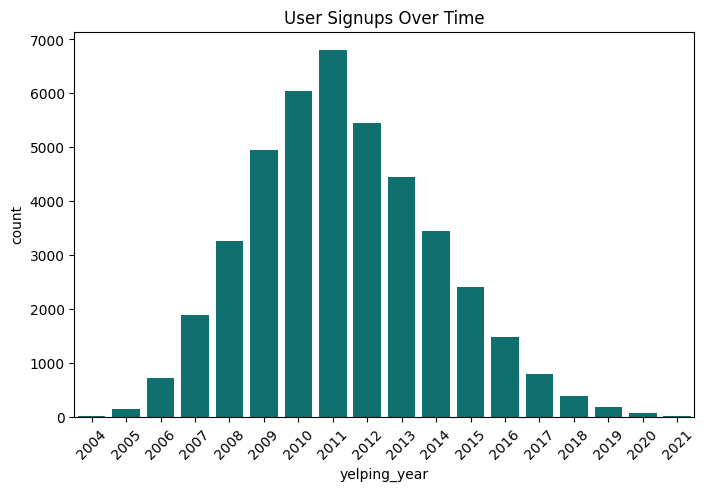

In [ ]:
#User signup trends over time

# Converting yelping_since to year
user_df_outliercleaned['yelping_since'] = pd.to_datetime(user_df_outliercleaned['yelping_since'], errors='coerce')
user_df_outliercleaned['yelping_year'] = user_df_outliercleaned['yelping_since'].dt.year

# Plotting signup trends over time
plt.figure(figsize=(8, 5))
sns.countplot(data=user_df_outliercleaned, x='yelping_year', color='teal', order=sorted(user_df_outliercleaned['yelping_year'].dropna().unique()))
plt.xticks(rotation=45)
plt.title("User Signups Over Time")
plt.show()

This chart shows the distribution of Yelp user signups by year, and it reveals several trends:

1. **Rapid growth phase (2006–2011)**

   * User signups start low in 2004–2005 (Yelp’s early years) and then climb quickly from 2006.
   * The peak is in **2011**, with nearly 7,000 signups that year.
   * This aligns with Yelp’s major expansion phase, aggressive marketing, and the rise in smartphone usage (and the Yelp mobile app).

2. **Gradual decline after 2011**

   * After the 2011 peak, there’s a steady decline in signups.
   * This could be due to market saturation, increased competition (Google Reviews, TripAdvisor, etc.), and changing patterns in how people discover businesses.

3. **Low signups after 2017**

   * Post-2017, signups drop sharply, with 2020–2021 nearly flat.
   * COVID-19 likely played a role in the sharp drop, as many local businesses closed temporarily and review activity slowed.

4. **Implication for long-time user analysis**

   * The largest pool of long-time users (who joined 2006–2012) are likely the most established contributors in the dataset.
   * This also means activity segmentation might show higher review counts and engagement for those early cohorts.

5. **Implication for building a recommender system**

   * **User engagement and data sparsity challenges**

    Most of Yelp’s users joined between 2006–2012, and those accounts are likely to have more reviews, more friends, and richer engagement data.

    Newer users (post-2017) are fewer in number and probably have fewer reviews, which makes it harder for collaborative filtering to work well for them due to the cold-start problem.

    Implication: The recommender system should handle data sparsity, for example by hybridizing with content-based methods or popularity-based recommendations for new users.

   * **Bias toward older content and businesses**

    If most the model's training data comes from older, highly active users, the system may over-represent older businesses or types of venues popular a decade ago.

    Solution: Introduce temporal weighting so that recent activity is given more importance, keeping recommendations fresh and relevant.